<center><h2>COMP40020: Human Language Technologies
Assignment 1 </h2></center>


#### imports

In [1]:
import nltk
import re
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import praw
from praw.models import MoreComments
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder


### references:
- Code was adapted from the following resources as well as code from the labs:
-  https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/
- https://medium.com/@kiddojazz/reddit-sentiment-analysis-f8a1a790124a
- https://towardsdatascience.com/automate-sentiment-analysis-process-for-reddit-post-textblob-and-vader-8a79c269522f

In [2]:
ci = "fQeiW15Vp7PWost_U0QkaA" #your client id
cs = "p2LFKOI2h6gyQ_Y3A9ilM-hprJGMiA" #your client secret
ua = "busterorwha" #your user agent name


In [3]:

reddit = praw.Reddit(client_id=ci,
                     client_secret=cs,
                     user_agent=ua)




### sets to hold headlines

In [4]:
headlines = set()
headlines_newZealand = set()

### Looking at 900 new post titles 

In [5]:
# r/ireland
for submission in reddit.subreddit('ireland').new(limit=900):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

897


In [6]:
# r/newzealand
for submission in reddit.subreddit('newzealand').new(limit=900):
    headlines_newZealand.add(submission.title)
    display.clear_output()
    print(len(headlines_newZealand))

900


### r/ireland

In [7]:
# function for sentiment analysis 
def sia_function(headlines):

    sia = SIA()
    results = []

    for line in headlines:
        pol_score = sia.polarity_scores(line)
        pol_score['headline'] = line
        results.append(pol_score)
        
    return results

    

In [8]:
# sentiment intensity analyser 

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.0, 'headline': 'Redundancy and Signing on', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.836,
  'headline': 'Drag queen Lavender accepts CMAT’s Choice Music Prize for best Irish album',
  'neg': 0.096,
  'neu': 0.406,
  'pos': 0.497},
 {'compound': 0.5562,
  'headline': 'Learning Irish as a carribean heritage Brit! Appreciation post.',
  'neg': 0.0,
  'neu': 0.661,
  'pos': 0.339}]


### r/newzealand

In [9]:
results_nz = sia_function(headlines_newZealand)
pprint(results_nz[:3], width=100)

[{'compound': 0.0, 'headline': 'travel insurance for WHV', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0,
  'headline': 'How about a flair for spiders?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.4019,
  'headline': 'Gaming PC help for my kid',
  'neg': 0.0,
  'neu': 0.649,
  'pos': 0.351}]


### dataframe r/ireland

In [10]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Redundancy and Signing on
1,0.096,0.406,0.497,0.8360,Drag queen Lavender accepts CMAT’s Choice Musi...
2,0.000,0.661,0.339,0.5562,Learning Irish as a carribean heritage Brit! A...
3,0.000,1.000,0.000,0.0000,Auralia cosmetic clinic.
4,0.000,1.000,0.000,0.0000,Joe.ie


### defining positive and negative label

In [11]:
def define_positive(df):
    df['label'] = 0
    df.loc[df['compound'] > 0.2, 'label'] = 1
    df.loc[df['compound'] < -0.2, 'label'] = -1
    return df
    

In [12]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Redundancy and Signing on,0
1,0.096,0.406,0.497,0.8360,Drag queen Lavender accepts CMAT’s Choice Musi...,1
2,0.000,0.661,0.339,0.5562,Learning Irish as a carribean heritage Brit! A...,1
3,0.000,1.000,0.000,0.0000,Auralia cosmetic clinic.,0
4,0.000,1.000,0.000,0.0000,Joe.ie,0


### dataframe r/newzealand

In [13]:
df_nz = pd.DataFrame.from_records(results_nz)
df_nz.head()

,neg,neu,pos,compound,headline
0,0.0,1.000,0.000,0.0000,travel insurance for WHV
1,0.0,1.000,0.000,0.0000,How about a flair for spiders?
2,0.0,0.649,0.351,0.4019,Gaming PC help for my kid
3,0.0,1.000,0.000,0.0000,Should Maccas do the same here?😀😂
4,0.0,0.809,0.191,0.5106,Reference to the 2nd New Zealand Division in n...


### defining positive and negative label

In [14]:
df_nz['label'] = 0
df_nz.loc[df_nz['compound'] > 0.2, 'label'] = 1
df_nz.loc[df_nz['compound'] < -0.2, 'label'] = -1
df_nz.head()

,neg,neu,pos,compound,headline,label
0,0.0,1.000,0.000,0.0000,travel insurance for WHV,0
1,0.0,1.000,0.000,0.0000,How about a flair for spiders?,0
2,0.0,0.649,0.351,0.4019,Gaming PC help for my kid,1
3,0.0,1.000,0.000,0.0000,Should Maccas do the same here?😀😂,0
4,0.0,0.809,0.191,0.5106,Reference to the 2nd New Zealand Division in n...,1


### example of positive and neg headlines r/ireland

In [15]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Drag queen Lavender accepts CMAT’s Choice Music Prize for best Irish album',
 'Learning Irish as a carribean heritage Brit! Appreciation post.',
 'Jesus is a Celtic fan',
 'When we wake up tomorrow morning Barry Keoghan could be an Oscar winning actor - Just let that sink in for a minute',
 'Farmers call for changes to solar energy scheme rules']

Negative headlines:

['How do you say "Change is hard" or "Change is difficult" in Irish? I\'m writing down this phrase in several languages for a school project but I don\'t trust google translate to be completely '
 'accurate. Thank you in advance!',
 'The Irish media are being so annoying about Paul Mescal and the Oscars.',
 'Stout spam',
 'Terminal illness moving in EU to be with family',
 "Opinion: The argument for more ministers? Just look at Roderic O'Gorman's workload"]


### example of positive and neg headlines r/newzealand

In [16]:
print("Positive headlines:\n")
pprint(list(df_nz[df_nz['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df_nz[df_nz['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Gaming PC help for my kid',
 'Reference to the 2nd New Zealand Division in new strategy video game Company of Heroes 3',
 "Bank profits 'costing New Zealanders $2000 a year each'",
 'Buying 2nd hand PC from online refurbishers',
 "'You can love more than one person’: My life living with two other women"]

Negative headlines:

["Banking expert says Kiwis' deposits would not be protected if NZ bank was to collapse",
 'Woman who used burner phones to harass ex-partner worked for police',
 'The Holy Hell of New Zealand’s Biggest Pentecostal Megachurches',
 'Anyone know where I can buy these pens? They\'re 7.0mm from the brand "easy office", but I can\'t find them anywhere! My office has them and they\'re everyone\'s favourites, but no one can seem to '
 'remember where they were brought from.',
 "National MPs follow Luxon's line of attack on public service contractors"]


### looking at value counts r/ireland

In [17]:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True) * 100)


 0    499
 1    211
-1    187
Name: label, dtype: int64
 0    55.629877
 1    23.522854
-1    20.847269
Name: label, dtype: float64


### looking at value counts r/newzealand

In [18]:
print(df_nz.label.value_counts())
print(df_nz.label.value_counts(normalize=True) * 100)

 0    525
-1    188
 1    187
Name: label, dtype: int64
 0    58.333333
-1    20.888889
 1    20.777778
Name: label, dtype: float64


### graph comparing results 

code adapted from: https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged 

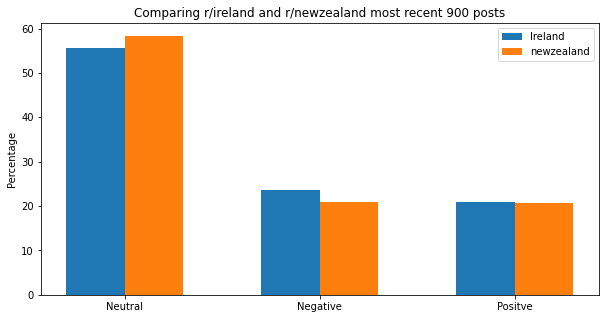

In [19]:
counts_nz = df_nz.label.value_counts(normalize=True) * 100

counts_ireland = df.label.value_counts(normalize=True) * 100
N = 3

blue_bar = (counts_ireland)
orange_bar = (counts_nz)

# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Ireland')
plt.bar(ind + width, orange_bar, width, label='newzealand')

plt.ylabel('Percentage')
plt.title('Comparing r/ireland and r/newzealand most recent 900 posts')

plt.xticks(ind + width / 2, ('Neutral', 'Negative', 'Positve'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

### detailed stats of r/ireland most recent 900 post titles

In [20]:
df.describe()

,neg,neu,pos,compound,label
count,897.000000,897.000000,897.000000,897.000000,897.000000
mean,0.074524,0.841479,0.082880,0.010822,0.026756
std,0.140575,0.190661,0.150649,0.353492,0.665943
min,0.000000,0.000000,0.000000,-0.931300,-1.000000
25%,0.000000,0.710000,0.000000,0.000000,0.000000
50%,0.000000,0.925000,0.000000,0.000000,0.000000
75%,0.109000,1.000000,0.130000,0.102700,0.000000
max,0.773000,1.000000,1.000000,0.939300,1.000000


### detailed stats of r/newzealand most recent 900 post titles

In [21]:
df_nz.describe()

,neg,neu,pos,compound,label
count,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.079311,0.840647,0.080034,-0.004452,-0.001111
std,0.150090,0.197680,0.153326,0.337100,0.645855
min,0.000000,0.141000,0.000000,-0.950900,-1.000000
25%,0.000000,0.707000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.116250,1.000000,0.118000,0.000000,0.000000
max,0.756000,1.000000,0.783000,0.895700,1.000000


### visualising compound scores

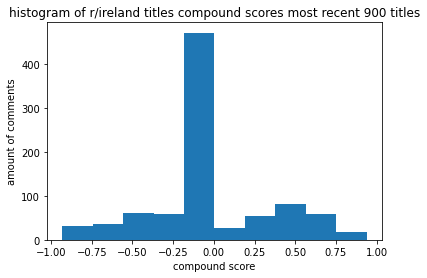

In [22]:
plt.hist(df["compound"], bins=10)

plt.title('histogram of r/ireland titles compound scores most recent 900 titles')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

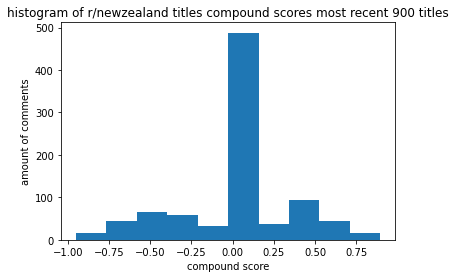

In [23]:
plt.hist(df_nz["compound"], bins=10)

plt.title('histogram of r/newzealand titles compound scores most recent 900 titles')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

### box plots of most recent 900 titles 

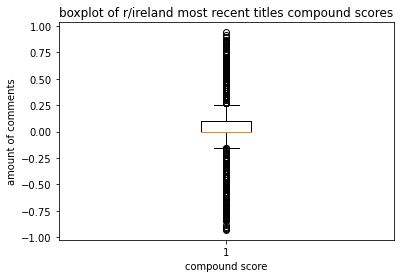

In [24]:
plt.boxplot(df["compound"])

plt.title('boxplot of r/ireland most recent titles compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

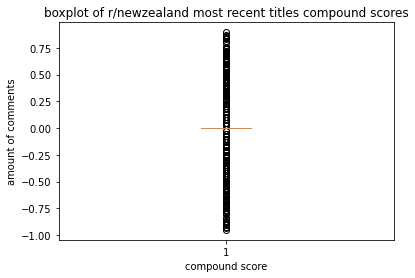

In [25]:
plt.boxplot(df_nz["compound"])

plt.title('boxplot of r/newzealand most recent titles compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

### Looking at headlines in more detail:

In [26]:
# tokenizer that only looks at words, removes punctuation and also treats new zealand as one token 
tokenizer = RegexpTokenizer(r'\b(?:New Zealand|new zealand)\b|[^\W\d]+')
stop_words = stopwords.words('english')

def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
#         removing stop words
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

### r/newzealand "positive" headlines

In [27]:
pos_lines_nz = list(df_nz[df_nz.label == 1].headline)

pos_tokens_nz = process_text(pos_lines_nz)
pos_freq_nz = nltk.FreqDist(pos_tokens_nz)

pos_freq_nz.most_common(20)

[('good', 17),
 ('nz', 17),
 ('best', 16),
 ('help', 15),
 ('new zealand', 11),
 ('new', 9),
 ('anyone', 9),
 ('please', 7),
 ('like', 7),
 ('get', 7),
 ('buying', 5),
 ('love', 5),
 ('government', 5),
 ('census', 5),
 ('people', 5),
 ('looking', 5),
 ('working', 5),
 ('kiwi', 5),
 ('job', 5),
 ('one', 4)]

### positive words r/newzealand 

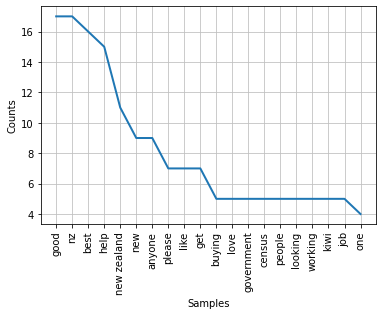

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
pos_freq_nz.plot(20)

### r/ireland - "positive" headlines 

In [29]:
pos_lines_ireland = list(df[df.label == 1].headline)

pos_tokens_ireland = process_text(pos_lines_ireland)
pos_freq_ireland = nltk.FreqDist(pos_tokens_ireland)

pos_freq_ireland.most_common(20)

[('ireland', 32),
 ('best', 16),
 ('irish', 16),
 ('like', 14),
 ('would', 14),
 ('get', 12),
 ('free', 12),
 ('good', 10),
 ('anyone', 9),
 ('help', 9),
 ('well', 9),
 ('day', 9),
 ('could', 8),
 ('credit', 8),
 ('house', 8),
 ('looking', 7),
 ('public', 7),
 ('time', 7),
 ('see', 6),
 ('snow', 6)]

### Positive words r/ireland most recent 900 post titles:

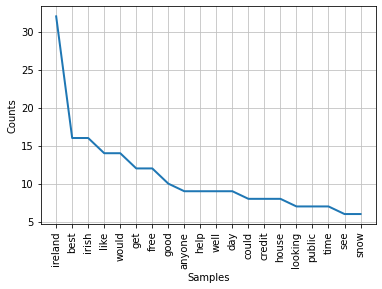

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
pos_freq_ireland.plot(20)

### r/newzealand "negative" headlines

In [31]:
neg_lines_nz = list(df_nz[df_nz.label == -1].headline)

neg_tokens_nz = process_text(neg_lines_nz)
neg_freq_nz = nltk.FreqDist(neg_tokens_nz)

neg_freq_nz.most_common(20)

[('nz', 18),
 ('auckland', 8),
 ('new zealand', 7),
 ('murder', 7),
 ('police', 6),
 ('house', 6),
 ('wrong', 6),
 ('years', 6),
 ('one', 5),
 ('court', 5),
 ('k', 5),
 ('new', 5),
 ('us', 5),
 ('help', 5),
 ('work', 5),
 ('bad', 5),
 ('advice', 5),
 ('anyone', 4),
 ('attack', 4),
 ('public', 4)]

### negative word frequency r/newzealand top 20 words

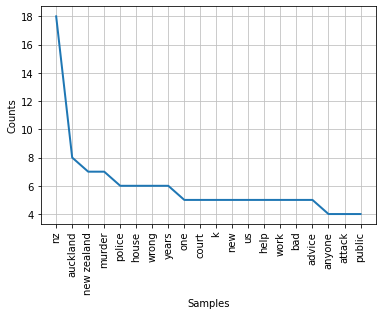

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
neg_freq_nz.plot(20)

### r/ireland - "negative" headlines 

In [33]:
neg_lines_ireland = list(df[df.label == -1].headline)

neg_tokens_ireland = process_text(neg_lines_ireland)
neg_freq_ireland = nltk.FreqDist(neg_tokens_ireland)

neg_freq_ireland.most_common(20)

[('eviction', 19),
 ('ban', 17),
 ('irish', 14),
 ('ireland', 11),
 ('man', 10),
 ('anyone', 8),
 ('home', 8),
 ('one', 7),
 ('time', 6),
 ('need', 6),
 ('scam', 6),
 ('woman', 5),
 ('got', 5),
 ('use', 5),
 ('year', 5),
 ('night', 5),
 ('jailed', 5),
 ('government', 5),
 ('dublin', 5),
 ('say', 4)]

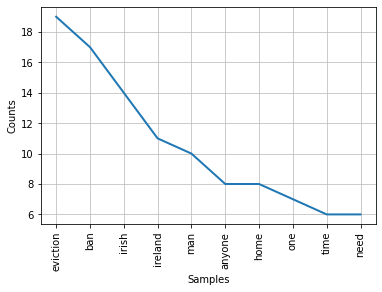

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
neg_freq_ireland.plot(10)

### looking at bigrams and trigrams

In [35]:
def bigramfunction(tokens):
    bigram_measures = BigramAssocMeasures()
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigrams = bigram_finder.nbest(bigram_measures.raw_freq, 10)
    return bigrams

In [36]:
def trigramfunction(tokens):
    trigram_measures = TrigramAssocMeasures()
    trigram_finder = TrigramCollocationFinder.from_words(tokens)
    trigrams = trigram_finder.nbest(trigram_measures.raw_freq, 10)
    return trigrams

### positive bigrams and trigrams

In [37]:
print("Top 10 most positive common 3-grams r/ireland:", bigramfunction(pos_tokens_ireland))


Top 10 most positive common 3-grams r/ireland: [('public', 'transport'), ('anyone', 'else'), ('free', 'public'), ('patrick', 'day'), ('st', 'patrick'), ('credit', 'union'), ('fine', 'gael'), ('tax', 'credit'), ('would', 'like'), ('would', 'love')]


In [38]:
print("Top 10 most  positive common 3-grams r/ireland:", trigramfunction(pos_tokens_ireland))

Top 10 most  positive common 3-grams r/ireland: [('free', 'public', 'transport'), ('st', 'patrick', 'day'), ('best', 'looking', 'mountain'), ('choice', 'music', 'prize'), ('international', 'women', 'day'), ('looking', 'mountain', 'ireland'), ('public', 'transport', 'would'), ('reduce', 'car', 'usage'), ('rent', 'tax', 'credit'), ('aa', 'ireland', 'calls')]


In [39]:
print("Top 10 most common positive 2-grams r/newzealnd:", bigramfunction(pos_tokens_nz))

Top 10 most common positive 2-grams r/newzealnd: [('air', 'nz'), ('best', 'best'), ('chemical', 'romance'), ('cyclone', 'gabrielle'), ('feel', 'like'), ('gabrielle', 'recovery'), ('gaming', 'pc'), ('good', 'job'), ('minimum', 'wage'), ('nd', 'hand')]


In [40]:
print("Top 10 most common positive 2-grams r/newzealnd:", trigramfunction(pos_tokens_nz))

Top 10 most common positive 2-grams r/newzealnd: [('cyclone', 'gabrielle', 'recovery'), ('accents', 'sexy', 'would'), ('according', 'latest', 'qv'), ('accurate', 'good', 'job'), ('accused', 'reporting', 'chinese'), ('act', 'cyclone', 'gabrielle'), ('actively', 'playing', 'wants'), ('actually', 'fit', 'love'), ('ad', 'wellington', 'museum'), ('adhd', 'diagnosis', 'psa')]


### negative bigrams and trigrams

In [41]:
print("Top 10 most common negative 2-grams r/ireland:", bigramfunction(neg_tokens_ireland))

Top 10 most common negative 2-grams r/ireland: [('eviction', 'ban'), ('anyone', 'else'), ('eviction', 'notices'), ('unemployment', 'rate'), ('average', 'unemployment'), ('ban', 'extended'), ('ban', 'extension'), ('ban', 'lifted'), ('breakingnews', 'ie'), ('car', 'use')]


In [42]:
print("Top 10 most  negative common 3-grams r/ireland:", trigramfunction(neg_tokens_ireland))

Top 10 most  negative common 3-grams r/ireland: [('average', 'unemployment', 'rate'), ('ending', 'eviction', 'ban'), ('eviction', 'ban', 'extended'), ('eviction', 'ban', 'extension'), ('eviction', 'ban', 'lifted'), ('saturday', 'night', 'live'), ('abandon', 'plans', 'home'), ('abroad', 'something', 'self'), ('abuse', 'children', 'gaa'), ('abuse', 'young', 'woman')]


In [43]:
print("Top 10 most common negative 2-grams r/newzealnd:", bigramfunction(neg_tokens_nz))

Top 10 most common negative 2-grams r/newzealnd: [('rob', 'campbell'), ('anyone', 'else'), ('bank', 'collapse'), ('chewing', 'thru'), ('comms', 'disaster'), ('consumer', 'nz'), ('containing', 'tahini'), ('dog', 'chewing'), ('fence', 'killing'), ('getting', 'worse')]


In [44]:
print("Top 10 most  negative common 3-grams r/newzealnd:", trigramfunction(neg_tokens_nz))

Top 10 most  negative common 3-grams r/newzealnd: [('chewing', 'thru', 'fence'), ('containing', 'tahini', 'recalled'), ('dog', 'chewing', 'thru'), ('fence', 'killing', 'cat'), ('recalled', 'salmonella', 'fears'), ('russia', 'ukraine', 'war'), ('tahini', 'recalled', 'salmonella'), ('thru', 'fence', 'killing'), ('absolute', 'disgrace', 'angry'), ('absolutely', 'fucked', 'fixing')]


### Looking at top 900 post titles 

In [45]:
headlines_ireland_top = set()
headlines_newZealand_top = set()

In [46]:
for submission in reddit.subreddit('newzealand').top(limit=900):
    headlines_newZealand_top.add(submission.title)
    display.clear_output()
    print(len(headlines_newZealand_top))

900


In [47]:
for submission in reddit.subreddit('ireland').top(limit=900):
    headlines_ireland_top.add(submission.title)
    display.clear_output()
    print(len(headlines_ireland_top))

897


### Sentiment intensity analysis r/ireland

In [48]:
results_ireland_top =  sia_function(headlines_ireland_top)
pprint(results_ireland_top[:3], width=100)


[{'compound': 0.0, 'headline': 'Spare a thought', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.3182,
  'headline': 'Ah sure yere a sound bunch really',
  'neg': 0.0,
  'neu': 0.685,
  'pos': 0.315},
 {'compound': 0.0,
  'headline': 'Second lock down paintings day 1',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


### Sentiment intensity analysis r/newzealand

In [49]:
results_newzealand_top =  sia_function(headlines_newZealand_top)
pprint(results_newzealand_top[:3], width=100)


[{'compound': -0.3612,
  'headline': 'In Regards To Predatory, Lazy News.',
  'neg': 0.333,
  'neu': 0.667,
  'pos': 0.0},
 {'compound': 0.3612,
  'headline': 'Tongans praying outside an Auckland Mosque this afternoon after their own church '
              'services. Photo by Mike Field #TheyAreUs',
  'neg': 0.0,
  'neu': 0.872,
  'pos': 0.128},
 {'compound': -0.4767,
  'headline': 'Russian Oligarchs have holdings in New Zealand. These holdings should be seized. '
              "Hit Russia's ruling class where it hurts.",
  'neg': 0.147,
  'neu': 0.853,
  'pos': 0.0}]


In [50]:
df_top_ireland = pd.DataFrame.from_records(results_ireland_top)
df_top_nz = pd.DataFrame.from_records(results_newzealand_top)


In [51]:
define_positive(df_top_ireland)

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Spare a thought,0
1,0.000,0.685,0.315,0.3182,Ah sure yere a sound bunch really,1
2,0.000,1.000,0.000,0.0000,Second lock down paintings day 1,0
3,0.000,1.000,0.000,0.0000,Seems about right,0
4,0.000,1.000,0.000,0.0000,Irish ingenuity.,0
...,...,...,...,...,...,...
892,0.159,0.841,0.000,-0.5574,"On this day, 19 years ago, Robbie Keane fired ...",-1
893,0.221,0.779,0.000,-0.5267,I was frustrated about another lockdown until ...,-1
894,0.000,1.000,0.000,0.0000,The first Semi Finalist is out. Wicklow is gon...,0
895,0.000,0.757,0.243,0.6697,All ATMs in Brussels been updated to this. Lad...,1


In [52]:
define_positive(df_top_nz)

,neg,neu,pos,compound,headline,label
0,0.333,0.667,0.000,-0.3612,"In Regards To Predatory, Lazy News.",-1
1,0.000,0.872,0.128,0.3612,Tongans praying outside an Auckland Mosque thi...,1
2,0.147,0.853,0.000,-0.4767,Russian Oligarchs have holdings in New Zealand...,-1
3,0.000,1.000,0.000,0.0000,Ram raids getting out of hand...,0
4,0.275,0.725,0.000,-0.6908,"NZ Herald, I know you read this sub, so I'm te...",-1
...,...,...,...,...,...,...
895,0.000,0.797,0.203,0.4215,The Police on the frontline in Wellington dese...,1
896,0.000,1.000,0.000,0.0000,NSFW - Contains Gore,0
897,0.087,0.725,0.188,0.7396,The US Antarctic Program is under managed isol...,1
898,0.000,1.000,0.000,0.0000,Get out there and stretch your legs,0


In [53]:
print("Positive headlines r/ireland:\n")
pprint(list(df_top_ireland[df_top_ireland['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines r/ireland:\n")
pprint(list(df_top_ireland[df_top_ireland['label'] == -1].headline)[:5], width=200)

Positive headlines r/ireland:

['Ah sure yere a sound bunch really',
 'I’m an artist who paints landscapes on coins, just finished this and thought I’d share.',
 'Fantastic news! We’ve just been informed that St James’s, the biggest hospital in the country, has no inpatients with #COVID for the first time since March 2020.',
 'The dream of many',
 'Sharon congrats 😊']

Negative headlines r/ireland:

["It's 20 years since the Holy Cross dispute. Where Loyalists hurled abuse, stones, bottles, fireworks, blast bombs and even containers of urine at girls as young as 4 and their parents trying to "
 'get to school.',
 'Burger King in Tralee gives no fucks at all',
 'Palestinian youth proudly fly Ireland National Flag while resisting Israeli state violence. Don’t forget them in your thoughts lads🇮🇪🇵🇸',
 'No comment',
 "If your bread doesn't look like this, it ain't real butter."]


In [54]:
print("Positive headlines r/newzealand:\n")
pprint(list(df_top_nz[df_top_nz['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines r/newzealand:\n")
pprint(list(df_top_nz[df_top_nz['label'] == -1].headline)[:5], width=200)

Positive headlines r/newzealand:

['Tongans praying outside an Auckland Mosque this afternoon after their own church services. Photo by Mike Field #TheyAreUs',
 'Good on you Helen!',
 'Combo One thanks.',
 'LEGO kākāpō given second chance',
 'Mel Bracewell is such an underrated Kiwi comedian']

Negative headlines r/newzealand:

['In Regards To Predatory, Lazy News.',
 "Russian Oligarchs have holdings in New Zealand. These holdings should be seized. Hit Russia's ruling class where it hurts.",
 "NZ Herald, I know you read this sub, so I'm telling you to cut this click-bait shit out.",
 'NZ compared to Ireland - saw this and have updated the numbers. NZ is doing something right. Kia kaha.',
 "As if we didn't have enough to worry about, my flatmate just found a worm in his Marshmallows!"]


### looking at value counts

In [55]:
print(df_top_ireland.label.value_counts())
print(df_top_ireland.label.value_counts(normalize=True) * 100)

 0    482
 1    265
-1    150
Name: label, dtype: int64
 0    53.734671
 1    29.542921
-1    16.722408
Name: label, dtype: float64


In [56]:
print(df_top_nz.label.value_counts())
print(df_top_nz.label.value_counts(normalize=True) * 100)

 0    461
 1    282
-1    157
Name: label, dtype: int64
 0    51.222222
 1    31.333333
-1    17.444444
Name: label, dtype: float64


In [57]:
counts_ireland_top = df_top_ireland.label.value_counts(normalize=True) * 100
counts_nz_top = df_top_nz.label.value_counts(normalize=True) * 100


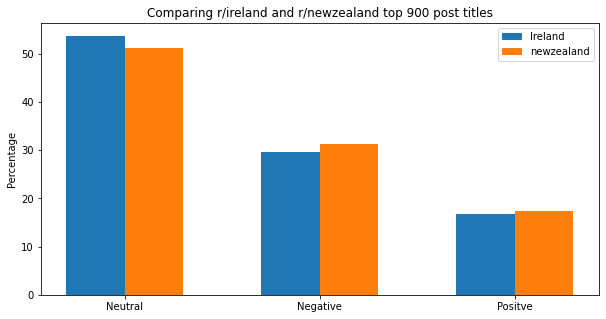

In [58]:
N = 3

blue_bar = (counts_ireland_top)
orange_bar = (counts_nz_top)

# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Ireland')
plt.bar(ind + width, orange_bar, width, label='newzealand')

plt.ylabel('Percentage')
plt.title('Comparing r/ireland and r/newzealand top 900 post titles')

plt.xticks(ind + width / 2, ('Neutral', 'Negative', 'Positve'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [59]:
df_top_ireland.describe()

,neg,neu,pos,compound,label
count,897.000000,897.000000,897.000000,897.000000,897.000000
mean,0.063901,0.807204,0.128892,0.064415,0.128205
std,0.137511,0.239661,0.219157,0.370326,0.668367
min,0.000000,0.000000,0.000000,-0.926600,-1.000000
25%,0.000000,0.665000,0.000000,0.000000,0.000000
50%,0.000000,0.913000,0.000000,0.000000,0.000000
75%,0.027000,1.000000,0.198000,0.359500,1.000000
max,0.783000,1.000000,1.000000,0.976900,1.000000


In [60]:
df_top_nz.describe()

,neg,neu,pos,compound,label
count,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.069777,0.810051,0.119064,0.075785,0.138889
std,0.144751,0.216119,0.181239,0.364761,0.684842
min,0.000000,0.000000,0.000000,-0.923100,-1.000000
25%,0.000000,0.667000,0.000000,0.000000,0.000000
50%,0.000000,0.852000,0.000000,0.000000,0.000000
75%,0.079250,1.000000,0.216500,0.361200,1.000000
max,1.000000,1.000000,1.000000,0.973800,1.000000


### visualising compound scores 

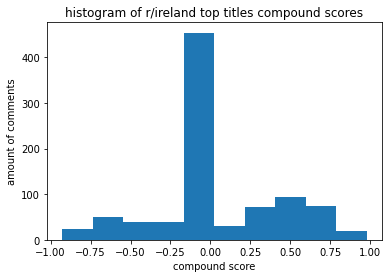

In [61]:
plt.hist(df_top_ireland["compound"], bins=10)

plt.title('histogram of r/ireland top titles compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

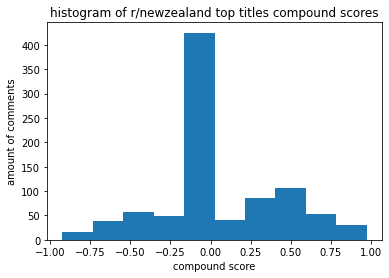

In [62]:
plt.hist(df_top_nz["compound"], bins=10)

plt.title('histogram of r/newzealand top titles compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

### box plots 

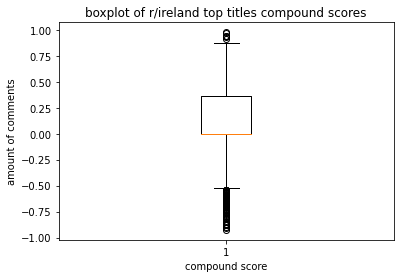

In [63]:
plt.boxplot(df_top_ireland["compound"])

plt.title('boxplot of r/ireland top titles compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

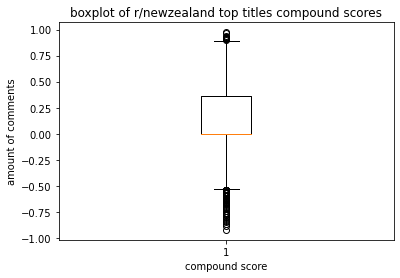

In [64]:
plt.boxplot(df_top_nz["compound"])

plt.title('boxplot of r/newzealand top titles compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

### Looking at top 900 titles counts in more detail. 

In [65]:
pos_lines_ireland = list(df_top_ireland[df_top_ireland.label == 1].headline)

pos_tokens_ireland = process_text(pos_lines_ireland)
pos_freq_ireland = nltk.FreqDist(pos_tokens_ireland)

pos_freq_ireland.most_common(20)

[('ireland', 43),
 ('irish', 30),
 ('like', 23),
 ('lads', 18),
 ('great', 17),
 ('day', 12),
 ('years', 12),
 ('dublin', 11),
 ('one', 11),
 ('today', 11),
 ('good', 9),
 ('true', 9),
 ('happy', 9),
 ('year', 9),
 ('sure', 8),
 ('time', 8),
 ('think', 8),
 ('better', 7),
 ('last', 7),
 ('best', 7)]

frequency plot top positive words from top 900 post title r/ireland


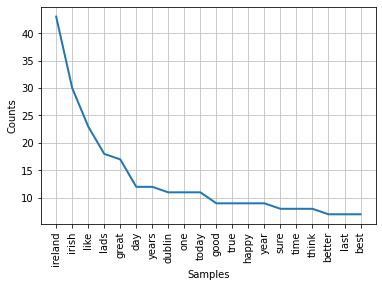

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [66]:
print("frequency plot top positive words from top 900 post title r/ireland")
pos_freq_ireland.plot(20)


In [67]:
pos_lines_nz = list(df_top_nz[df_top_nz.label == 1].headline)

pos_tokens_nz = process_text(pos_lines_nz)
pos_freq_nz = nltk.FreqDist(pos_tokens_nz)

pos_freq_nz.most_common(20)

[('new zealand', 35),
 ('nz', 34),
 ('like', 29),
 ('good', 18),
 ('us', 13),
 ('new', 12),
 ('country', 11),
 ('today', 11),
 ('love', 11),
 ('made', 10),
 ('proud', 10),
 ('people', 9),
 ('please', 9),
 ('kiwi', 8),
 ('free', 8),
 ('best', 8),
 ('day', 8),
 ('thank', 8),
 ('time', 8),
 ('party', 8)]

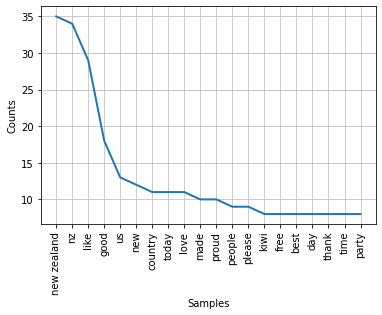

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [68]:
pos_freq_nz.plot(20)


In [69]:
neg_lines_ire = list(df_top_ireland[df_top_ireland.label == -1].headline)

neg_tokens_ire = process_text(neg_lines_ire)
neg_freq_ire = nltk.FreqDist(neg_tokens_ire)

neg_freq_ire.most_common(20)

[('irish', 19),
 ('ireland', 17),
 ('years', 12),
 ('dublin', 11),
 ('today', 11),
 ('one', 10),
 ('ago', 8),
 ('day', 8),
 ('people', 8),
 ('lads', 7),
 ('get', 6),
 ('ya', 6),
 ('american', 6),
 ('abuse', 5),
 ('like', 5),
 ('stop', 5),
 ('round', 5),
 ('shit', 5),
 ('died', 5),
 ('think', 5)]

frequency plot top negative words from top 900 post title r/ireland


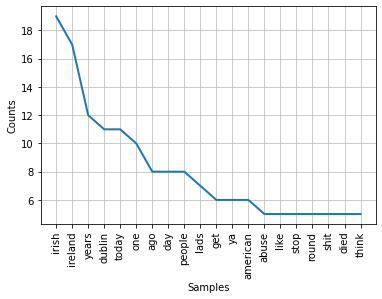

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [70]:
print("frequency plot top negative words from top 900 post title r/ireland")

neg_freq_ire.plot(20)


In [71]:
neg_lines_nz = list(df_top_nz[df_top_nz.label == -1].headline)

neg_tokens_nz = process_text(neg_lines_nz)
neg_freq_nz = nltk.FreqDist(neg_tokens_nz)

neg_freq_nz.most_common(20)

[('new zealand', 29),
 ('nz', 16),
 ('today', 8),
 ('fuck', 8),
 ('country', 7),
 ('police', 7),
 ('world', 7),
 ('shit', 6),
 ('man', 6),
 ('people', 6),
 ('auckland', 6),
 ('covid', 6),
 ('like', 5),
 ('crisis', 5),
 ('bad', 5),
 ('new', 5),
 ('much', 5),
 ('want', 5),
 ('get', 5),
 ('news', 4)]

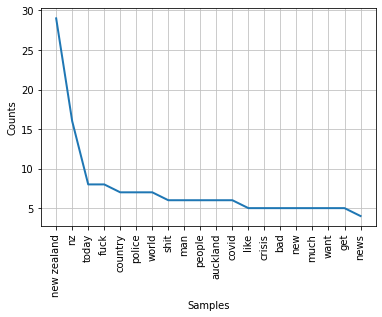

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [72]:
neg_freq_nz.plot(20)


### looking at bigrams and trigrams

### positive bigrams and trigrams

In [73]:
print("Top 10 most positive common 3-grams r/ireland:", bigramfunction(pos_tokens_ireland))


Top 10 most positive common 3-grams r/ireland: [('bunch', 'lads'), ('great', 'bunch'), ('ah', 'sure'), ('anyone', 'else'), ('first', 'time'), ('last', 'days'), ('looks', 'like'), ('pretty', 'much'), ('r', 'ireland'), ('years', 'ago')]


In [74]:
print("Top 10 most  positive common 3-grams r/ireland:", trigramfunction(pos_tokens_ireland))


Top 10 most  positive common 3-grams r/ireland: [('great', 'bunch', 'lads'), ('comments', 'gets', 'deleted'), ('county', 'comments', 'gets'), ('pretty', 'much', 'sums'), ('top', 'income', 'earners'), ('upvoted', 'county', 'comments'), ('able', 'drive', 'far'), ('able', 'pay', 'goods'), ('abortion', 'cases', 'fetus'), ('accent', 'best', 'thing')]


In [75]:
print("Top 10 most common positive 2-grams r/newzealnd:", bigramfunction(pos_tokens_nz))


Top 10 most common positive 2-grams r/newzealnd: [('cone', 'dog'), ('looks', 'like'), ('people', 'new zealand'), ('good', 'month'), ('naughty', 'good'), ('alert', 'level'), ('love', 'country'), ('new', 'zealander'), ('taika', 'waititi'), ('year', 'old')]


In [76]:
print("Top 10 most common positive 2-grams r/newzealnd:", trigramfunction(pos_tokens_nz))


Top 10 most common positive 2-grams r/newzealnd: [('naughty', 'good', 'month'), ('happy', 'new', 'year'), ('move', 'alert', 'level'), ('orange', 'voting', 'guy'), ('able', 'enjoy', 'beautiful'), ('able', 'walk', 'home'), ('absolute', 'plonker', 'thinks'), ('absolutely', 'love', 'country'), ('absolutely', 'self', 'respect'), ('absolutely', 'stunning', 'gorgeous')]


### negative bigrams and trigrams

In [77]:
print("Top 10 most common negative 2-grams r/ireland:", bigramfunction(neg_tokens_ire))


Top 10 most common negative 2-grams r/ireland: [('years', 'ago'), ('last', 'night'), ('ago', 'today'), ('day', 'years'), ('british', 'state'), ('comments', 'gets'), ('county', 'comments'), ('despite', 'overwhelming'), ('died', 'today'), ('dublin', 'monaghan')]


In [78]:
print("Top 10 most  negative common 3-grams r/ireland:", trigramfunction(neg_tokens_ire))


Top 10 most  negative common 3-grams r/ireland: [('day', 'years', 'ago'), ('years', 'ago', 'today'), ('british', 'state', 'involvement'), ('comments', 'gets', 'deleted'), ('county', 'comments', 'gets'), ('despite', 'overwhelming', 'evidence'), ('evidence', 'british', 'state'), ('overwhelming', 'evidence', 'british'), ('quinn', 'signing', 'pledge'), ('raise', 'registration', 'fees')]


In [79]:
print("Top 10 most common negative 2-grams r/newzealnd:", bigramfunction(neg_tokens_nz))


Top 10 most common negative 2-grams r/newzealnd: [('child', 'poverty'), ('housing', 'crisis'), ('jacinda', 'ardern'), ('kia', 'ora'), ('new', 'zealander'), ('prime', 'minister'), ('blah', 'blah'), ('last', 'night'), ('nz', 'herald'), ('today', 'new zealand')]


In [80]:
print("Top 10 most  negative common 3-grams r/newzealnd:", trigramfunction(neg_tokens_nz))


Top 10 most  negative common 3-grams r/newzealnd: [('abottabad', 'nzctu', 'national'), ('abused', 'supermarkets', 'making'), ('access', 'newborn', 'partner'), ('accomplice', 'seriously', 'massey'), ('according', 'latest', 'news'), ('accuses', 'new zealand', 'prime'), ('across', 'country', 'bad'), ('across', 'world', 'got'), ('act', 'leader', 'david'), ('action', 'lower', 'house')]


### Looking at comments of top posts 

In [81]:
def sia_function(comments):

    sia = SIA()
    results = []

    for line in comments:
        pol_score = sia.polarity_scores(line)
        pol_score['comment'] = line
        results.append(pol_score)
        
    return results

### gathering comments from r/ireland

In [82]:
comments_ireland = set()
# r/ireland
for submission in reddit.subreddit('ireland').top(limit=10):
    for comment in submission.comments:
            if isinstance(comment, MoreComments):
                continue
            comments_ireland.add(comment.body)
            display.clear_output()
            print(len(comments_ireland))

    


1485


### gathering comments from r/newzeland

In [83]:
comments_nz = set()
# r/ireland
for submission in reddit.subreddit('newzealand').top(limit=10):
    for comment in submission.comments:
            if isinstance(comment, MoreComments):
                continue
            comments_nz.add(comment.body)
            display.clear_output()
            print(len(comments_nz))

    


1560


#### sentiment intensity analysis for comments r/ireland

In [84]:
comments_results_ireland = sia_function(comments_ireland)
pprint(comments_results_ireland[:3], width=100)

[{'comment': 'Yes boi! Gon on Italy!!', 'compound': 0.5538, 'neg': 0.0, 'neu': 0.528, 'pos': 0.472},
 {'comment': 'NOOOOOOOO FUCK 2020', 'compound': -0.6408, 'neg': 0.679, 'neu': 0.321, 'pos': 0.0},
 {'comment': 'Apparently it’s existed for some time now.',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


#### sentiment intensity analysis for comments r/newzealand

In [85]:
comments_results_newzealand = sia_function(comments_nz)
pprint(comments_results_newzealand[:3], width=100)

[{'comment': 'Can I get this as an actual lawn sign?',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'comment': 'This is great news! Well done team.',
  'compound': 0.7574,
  'neg': 0.0,
  'neu': 0.435,
  'pos': 0.565},
 {'comment': 'Saw that the other night - I had just ordered $180 worth of pizza for a party so I’m '
             'sorry but noooo. Plus they forgot half the order anyways and had to go back to the '
             'store...',
  'compound': 0.2525,
  'neg': 0.036,
  'neu': 0.871,
  'pos': 0.093}]


### converting results to dataframes 

In [86]:
df_comments_ireland = pd.DataFrame.from_records(comments_results_ireland)
df_comments_ireland.head()

,neg,neu,pos,compound,comment
0,0.000,0.528,0.472,0.5538,Yes boi! Gon on Italy!!
1,0.679,0.321,0.000,-0.6408,NOOOOOOOO FUCK 2020
2,0.000,1.000,0.000,0.0000,Apparently it’s existed for some time now.
3,0.195,0.728,0.076,-0.5574,"American, here. Please keep us out, for now.\n..."
4,0.121,0.827,0.051,-0.5010,"I used to think about it this way too, but the..."


In [87]:
df_comments_newzealand = pd.DataFrame.from_records(comments_results_newzealand)
df_comments_newzealand.head()

,neg,neu,pos,compound,comment
0,0.000,1.000,0.000,0.0000,Can I get this as an actual lawn sign?
1,0.000,0.435,0.565,0.7574,This is great news! Well done team.
2,0.036,0.871,0.093,0.2525,Saw that the other night - I had just ordered ...
3,0.000,0.896,0.104,0.1877,You just have to look at what's going on in Am...
4,0.000,0.687,0.313,0.4926,Thanks for all the updates along the way!


### defining positive and negative comments based on compound score: 

In [88]:
df_comments_ireland['label'] = 0
df_comments_ireland.loc[df_comments_ireland['compound'] > 0.2, 'label'] = 1
df_comments_ireland.loc[df_comments_ireland['compound'] < -0.2, 'label'] = -1
df_comments_ireland.head()

,neg,neu,pos,compound,comment,label
0,0.000,0.528,0.472,0.5538,Yes boi! Gon on Italy!!,1
1,0.679,0.321,0.000,-0.6408,NOOOOOOOO FUCK 2020,-1
2,0.000,1.000,0.000,0.0000,Apparently it’s existed for some time now.,0
3,0.195,0.728,0.076,-0.5574,"American, here. Please keep us out, for now.\n...",-1
4,0.121,0.827,0.051,-0.5010,"I used to think about it this way too, but the...",-1


In [89]:
df_comments_newzealand['label'] = 0
df_comments_newzealand.loc[df_comments_newzealand['compound'] > 0.2, 'label'] = 1
df_comments_newzealand.loc[df_comments_newzealand['compound'] < -0.2, 'label'] = -1
df_comments_newzealand.head()

,neg,neu,pos,compound,comment,label
0,0.000,1.000,0.000,0.0000,Can I get this as an actual lawn sign?,0
1,0.000,0.435,0.565,0.7574,This is great news! Well done team.,1
2,0.036,0.871,0.093,0.2525,Saw that the other night - I had just ordered ...,1
3,0.000,0.896,0.104,0.1877,You just have to look at what's going on in Am...,0
4,0.000,0.687,0.313,0.4926,Thanks for all the updates along the way!,1


### example of positive and negative comments  r/ireland

In [90]:
print("Positive comment:\n")
pprint(list(df_comments_ireland[df_comments_ireland['label'] == 1].comment)[:5], width=200)

print("\nNegative comment:\n")
pprint(list(df_comments_ireland[df_comments_ireland['label'] == -1].comment)[:5], width=200)

Positive comment:

['Yes boi! Gon on Italy!!',
 'Maybe it helps if you give them the same deal as Apple',
 'You love to see it.',
 '[Link to Ukrainian Charities ](https://www.reddit.com/r/ukraine/comments/s6g5un/want_to_support_ukraine_heres_a_list_of_charities/?utm_source=share&utm_medium=ios_app&utm_name=iossmf)',
 'Humans’ best friend -  RIP Sioda.  Love on RGB for me!']

Negative comment:

['NOOOOOOOO FUCK 2020',
 'American, here. Please keep us out, for now.\n\nAmerica has lost its fucking mind, and we need to sort out some shit. I mean, *obviously*, right?',
 'I used to think about it this way too, but the deposit is actually to lower the banks risk overall on the investment. If the market goes down at least there is a little margin for them. Also '
 'owning a house is expensive! Expect to pay 2-5% of the homes value per year to keep it going.',
 "It doesn't help that the Americans most likely to travel are also the ones who are least likely to wear a mask, distance, or take any 

### example of positive and negative comments  r/newzealand

In [91]:
print("Positive comment:\n")
pprint(list(df_comments_newzealand[df_comments_newzealand['label'] == 1].comment)[:5], width=200)

print("\nNegative comment:\n")
pprint(list(df_comments_newzealand[df_comments_newzealand['label'] == -1].comment)[:5], width=200)

Positive comment:

['This is great news! Well done team.',
 'Saw that the other night - I had just ordered $180 worth of pizza for a party so I’m sorry but noooo. Plus they forgot half the order anyways and had to go back to the store...',
 'Thanks for all the updates along the way!',
 "I don't get this. People vote for their own interests, that's why everyone gets a vote.",
 'This is Darren. He has a networth of $3.2 million. Darren talks to his accountant and his tax lawyer. With a little bit of help from their friendly banker, the rules around trusts in New Zealand, '
 "and how the Greens are proposing debt is treated in this new law, it's just taken a few minor tweaks to his situation, he successfully skirts the wealth tax. As he goes to sleep in his home in "
 "Herne Bay he laughs to himself at how terribly designed this idea was, and thanks the good lord above that they didn't implement a capital gains tax - that could have caused him some real trouble."]

Negative comment:

['We

### looking at value counts

In [92]:
print(df_comments_ireland.label.value_counts())
print(df_comments_ireland.label.value_counts(normalize=True) * 100)

 1    550
-1    470
 0    465
Name: label, dtype: int64
 1    37.037037
-1    31.649832
 0    31.313131
Name: label, dtype: float64


In [93]:
print(df_comments_newzealand.label.value_counts())
print(df_comments_newzealand.label.value_counts(normalize=True) * 100)

 1    629
 0    470
-1    461
Name: label, dtype: int64
 1    40.320513
 0    30.128205
-1    29.551282
Name: label, dtype: float64


### visualising value counts 

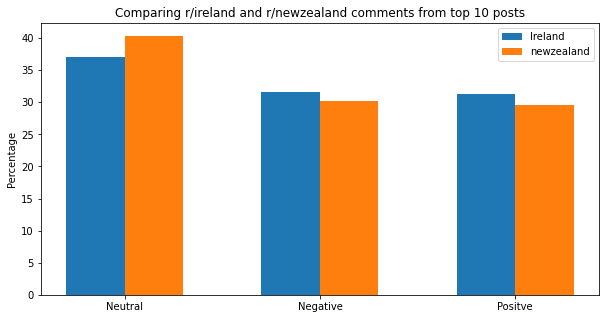

In [94]:
comments_counts_nz = df_comments_newzealand.label.value_counts(normalize=True) * 100
comments_counts_ireland =  df_comments_ireland.label.value_counts(normalize=True) * 100
N = 3

blue_bar = (comments_counts_ireland)
orange_bar = (comments_counts_nz)

# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Ireland')
plt.bar(ind + width, orange_bar, width, label='newzealand')

plt.ylabel('Percentage')
plt.title('Comparing r/ireland and r/newzealand comments from top 10 posts')

plt.xticks(ind + width / 2, ('Neutral', 'Negative', 'Positve'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [95]:
df_comments_ireland.head(10)

,neg,neu,pos,compound,comment,label
0,0.000,0.528,0.472,0.5538,Yes boi! Gon on Italy!!,1
1,0.679,0.321,0.000,-0.6408,NOOOOOOOO FUCK 2020,-1
2,0.000,1.000,0.000,0.0000,Apparently it’s existed for some time now.,0
3,0.195,0.728,0.076,-0.5574,"American, here. Please keep us out, for now.\n...",-1
4,0.121,0.827,0.051,-0.5010,"I used to think about it this way too, but the...",-1
5,0.082,0.815,0.103,-0.1655,I do agree there doesn’t seem much benefit not...,0
6,0.000,1.000,0.000,0.0000,You guys don’t have bell peppers or cilantro?,0
7,0.116,0.799,0.084,-0.4312,It doesn't help that the Americans most likely...,-1
8,0.390,0.610,0.000,-0.3724,Nothing to be proud of.,-1
9,0.000,0.809,0.191,0.3818,Maybe it helps if you give them the same deal ...,1


In [96]:
df_comments_ireland.describe()

,neg,neu,pos,compound,label
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.111438,0.742212,0.142296,0.036248,0.053872
std,0.163258,0.219192,0.183788,0.503418,0.827301
min,0.000000,0.000000,0.000000,-0.986200,-1.000000
25%,0.000000,0.612000,0.000000,-0.361200,-1.000000
50%,0.026000,0.773000,0.076000,0.000000,0.000000
75%,0.167000,0.917000,0.222000,0.440400,1.000000
max,1.000000,1.000000,1.000000,0.987400,1.000000


In [97]:
df_comments_newzealand.describe()

,neg,neu,pos,compound,label
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,0.106790,0.748525,0.142763,0.069173,0.107692
std,0.150094,0.198693,0.164744,0.529840,0.829193
min,0.000000,0.000000,0.000000,-0.991400,-1.000000
25%,0.000000,0.640750,0.000000,-0.336100,-1.000000
50%,0.051500,0.766000,0.107000,0.000000,0.000000
75%,0.167000,0.887000,0.216000,0.526700,1.000000
max,1.000000,1.000000,1.000000,0.988500,1.000000


### visualising compound scores for the sub reddits

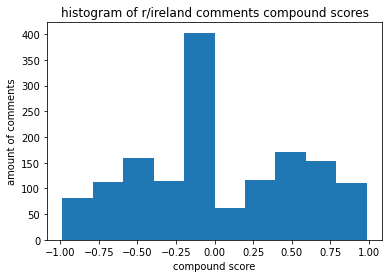

In [98]:
plt.hist(df_comments_ireland["compound"], bins=10)

plt.title('histogram of r/ireland comments compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

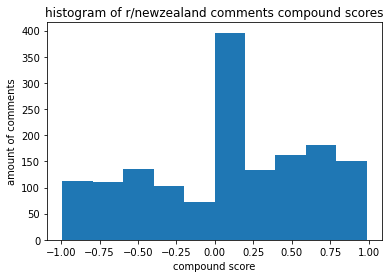

In [99]:
plt.hist(df_comments_newzealand["compound"], bins=10)

plt.title('histogram of r/newzealand comments compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

## box plots 

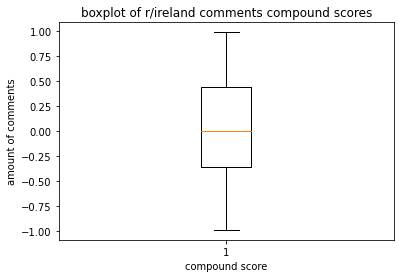

In [100]:
plt.boxplot(df_comments_ireland["compound"])

plt.title('boxplot of r/ireland comments compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

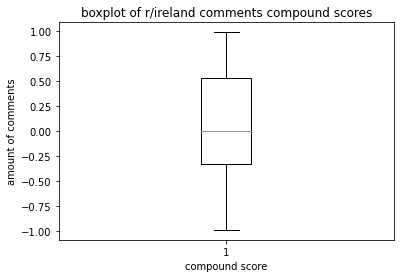

In [101]:
plt.boxplot(df_comments_newzealand["compound"])

plt.title('boxplot of r/ireland comments compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

### looking at positive comments in more detail

In [102]:
pos_comments_ireland = list(df_comments_ireland[df_comments_ireland.label == 1].comment)

pos_tokens_comments_ireland = process_text(pos_comments_ireland)
pos_freq_comments_ireland = nltk.FreqDist(pos_tokens_comments_ireland)

pos_freq_comments_ireland.most_common(20)

[('like', 81),
 ('ireland', 72),
 ('american', 69),
 ('us', 62),
 ('love', 57),
 ('get', 56),
 ('good', 45),
 ('people', 43),
 ('go', 39),
 ('well', 39),
 ('irish', 37),
 ('would', 36),
 ('back', 36),
 ('know', 34),
 ('croatia', 34),
 ('great', 34),
 ('time', 33),
 ('one', 33),
 ('house', 32),
 ('need', 32)]

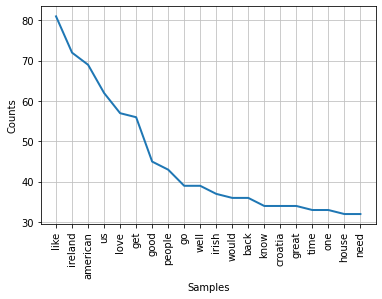

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [103]:
pos_freq_comments_ireland.plot(20)


In [104]:
pos_comments_nz = list(df_comments_newzealand[df_comments_newzealand.label == 1].comment)

pos_tokens_comments_nz = process_text(pos_comments_nz)
pos_freq_comments_nz = nltk.FreqDist(pos_tokens_comments_nz)

pos_freq_comments_nz.most_common(20)

[('people', 140),
 ('like', 117),
 ('nz', 89),
 ('country', 73),
 ('us', 66),
 ('good', 63),
 ('get', 61),
 ('new zealand', 61),
 ('well', 57),
 ('would', 55),
 ('vote', 49),
 ('want', 47),
 ('love', 45),
 ('know', 44),
 ('time', 44),
 ('much', 43),
 ('even', 43),
 ('make', 43),
 ('one', 41),
 ('free', 40)]

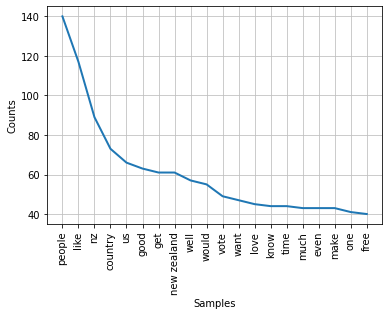

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [105]:
pos_freq_comments_nz.plot(20)


### looking at negative comments in more detail

In [106]:
neg_comments_ireland = list(df_comments_ireland[df_comments_ireland.label == -1].comment)

neg_tokens_comments_ireland = process_text(neg_comments_ireland)
neg_freq_comments_ireland = nltk.FreqDist(neg_tokens_comments_ireland)

neg_freq_comments_ireland.most_common(20)

[('us', 83),
 ('american', 73),
 ('people', 66),
 ('fuck', 64),
 ('get', 56),
 ('back', 53),
 ('deposit', 51),
 ('ban', 44),
 ('house', 43),
 ('rent', 42),
 ('ireland', 40),
 ('country', 39),
 ('like', 37),
 ('one', 35),
 ('shit', 34),
 ('fucking', 33),
 ('would', 32),
 ('years', 31),
 ('americans', 30),
 ('pay', 29)]

frequency plot of top 20 'negative' from comments r/ireland 


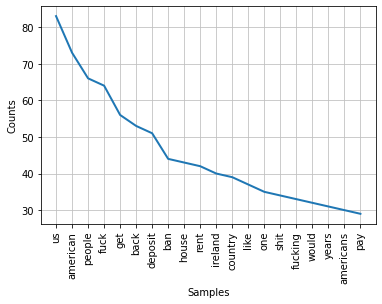

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [107]:
print("frequency plot of top 20 'negative' from comments r/ireland ")
neg_freq_comments_ireland.plot(20)


In [108]:
neg_comments_nz = list(df_comments_newzealand[df_comments_newzealand.label == -1].comment)

neg_tokens_comments_nz = process_text(neg_comments_nz)
neg_freq_comments_nz = nltk.FreqDist(neg_tokens_comments_nz)

neg_freq_comments_nz.most_common(20)

[('people', 114),
 ('fuck', 74),
 ('like', 59),
 ('shit', 58),
 ('get', 54),
 ('tipping', 49),
 ('nz', 45),
 ('one', 41),
 ('time', 41),
 ('us', 40),
 ('tip', 38),
 ('would', 37),
 ('pay', 35),
 ('fucking', 34),
 ('country', 33),
 ('know', 32),
 ('covid', 31),
 ('new zealand', 31),
 ('go', 29),
 ('also', 28)]

frequency plot of top 20 'negative' from comments r/newzealand 


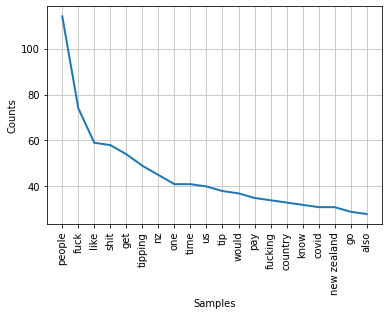

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [109]:
print("frequency plot of top 20 'negative' from comments r/newzealand ")

neg_freq_comments_nz.plot(20)


### looking at bigrams and trigrams


### positive bigrams and trigrams


In [110]:
print("Top 10 most positive common 3-grams r/ireland:", bigramfunction(pos_tokens_comments_ireland  ))


Top 10 most positive common 3-grams r/ireland: [('american', 'agree'), ('https', 'www'), ('gov', 'pl'), ('polish', 'border'), ('great', 'bunch'), ('bunch', 'lads'), ('need', 'visa'), ('pl', 'web'), ('udsc', 'ukraina'), ('web', 'udsc')]


In [111]:
print("Top 10 most  positive common 3-grams r/ireland:", trigramfunction(pos_tokens_comments_ireland ))


Top 10 most  positive common 3-grams r/ireland: [('gov', 'pl', 'web'), ('great', 'bunch', 'lads'), ('https', 'www', 'gov'), ('pl', 'web', 'udsc'), ('web', 'udsc', 'ukraina'), ('www', 'gov', 'pl'), ('aid', 'polish', 'government'), ('anyone', 'seeking', 'help'), ('arrival', 'reception', 'points'), ('asylum', 'go', 'towards')]


In [112]:
print("Top 10 most common positive 2-grams r/newzealnd:", bigramfunction(pos_tokens_comments_nz ))


Top 10 most common positive 2-grams r/newzealnd: [('wealth', 'tax'), ('well', 'done'), ('https', 'www'), ('looks', 'like'), ('u', 'kezzanz'), ('x', 'b'), ('good', 'job'), ('k', 'year'), ('free', 'lunches'), ('minimum', 'wage')]


In [113]:
print("Top 10 most common positive 2-grams r/newzealnd:", trigramfunction(pos_tokens_comments_nz ))


Top 10 most common positive 2-grams r/newzealnd: [('ability', 'understand', 'share'), ('understand', 'share', 'feelings'), ('words', 'u', 'im_a_cunt'), ('back', 'menu', 'boys'), ('co', 'uk', 'article'), ('en', 'wikipedia', 'org'), ('https', 'en', 'wikipedia'), ('https', 'www', 'thetimes'), ('thank', 'kind', 'words'), ('thanks', 'u', 'kezzanz')]


### negative bigrams and trigrams


In [114]:
print("Top 10 most common negative 2-grams r/ireland:", bigramfunction(neg_tokens_comments_ireland ))


Top 10 most common negative 2-grams r/ireland: [('ban', 'us'), ('deposit', 'back'), ('american', 'please'), ('damage', 'deposit'), ('please', 'ban'), ('let', 'us'), ('ban', 'americans'), ('buy', 'house'), ('month', 'rent'), ('pay', 'back')]


In [115]:
print("Top 10 most  negative common 3-grams r/ireland:", trigramfunction(neg_tokens_comments_ireland ))


Top 10 most  negative common 3-grams r/ireland: [('please', 'ban', 'us'), ('american', 'please', 'ban'), ('ban', 'us', 'please'), ('national', 'day', 'mourning'), ('american', 'ban', 'us'), ('american', 'completely', 'agree'), ('american', 'let', 'us'), ('american', 'visited', 'ireland'), ('ban', 'americans', 'coming'), ('ban', 'us', 'seriously')]


In [116]:
print("Top 10 most common negative 2-grams r/newzealnd:", bigramfunction(neg_tokens_comments_nz ))


Top 10 most common negative 2-grams r/newzealnd: [('kia', 'kaha'), ('tipping', 'culture'), ('minimum', 'wage'), ('pay', 'staff'), ('years', 'ago'), ('delivery', 'driver'), ('delivery', 'expert'), ('etc', 'etc'), ('feel', 'like'), ('fuck', 'tipping')]


In [117]:
print("Top 10 most  negative common 3-grams r/newzealnd:", trigramfunction(neg_tokens_comments_nz ))


Top 10 most  negative common 3-grams r/newzealnd: [('hate', 'tipping', 'culture'), ('spectrum', 'political', 'opinions'), ('american', 'tipping', 'rooted'), ('black', 'friday', 'sales'), ('co', 'nz', 'feedback'), ('covid', 'pie', 'sky'), ('dynamic', 'nzherald', 'co'), ('eliminating', 'covid', 'pie'), ('every', 'time', 'read'), ('feedback', 'index', 'cfm')]
